# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Amin Kashiri
2.   Student Number: 97101026


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [45]:
dataset = pd.read_csv("./data/data01.csv")
dataset = dataset.to_numpy()

train = dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]

x_train = train[: , 1].reshape(-1,1)
y_train = train[: , 2].reshape(-1,1)

# Getting labels
x_test = test[: , 1].reshape(-1,1)
y_test = test[: , 2].reshape(-1,1)

print("Train: ", x_train.shape ,y_train.shape)
print("Test: " ,x_test.shape ,y_test.shape)


Train:  (400, 1) (400, 1)
Test:  (100, 1) (100, 1)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [94]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

X = np.hstack((x_train, np.ones((len(x_train), 1))))
# X = np.hstack((x_train, np.ones((l, 1))))

m = np.linalg.inv(X.T @ X) @ X.T @ y_train
m


<class 'numpy.ndarray'>


array([[-1.02641738],
       [ 0.81500634]])

In [47]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

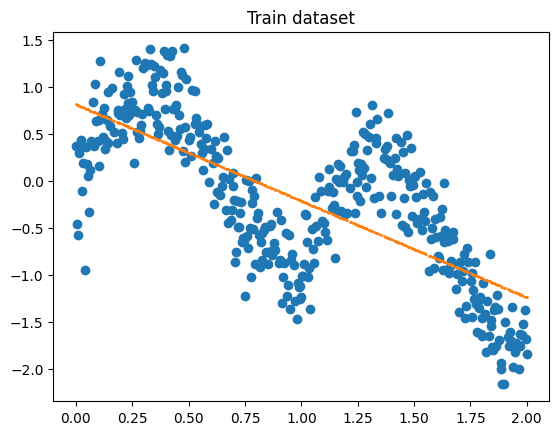

In [48]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

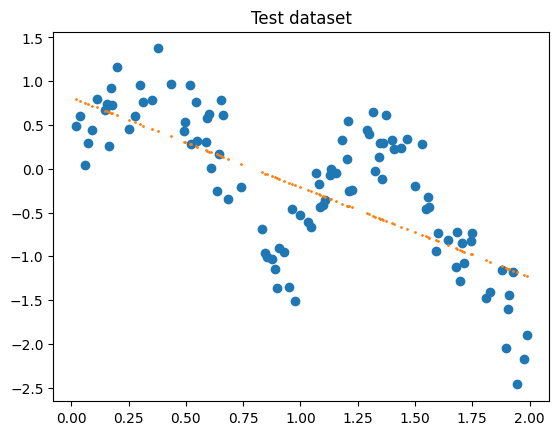

In [49]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

The reported accuracy shows that the mean squared error is around 0.3. However, MSE has a lot of problems in evaluating a models performance. Nevertheless, it is acceptable. The line shows the general trend of the data and has explained a fraction of variance. Obviuosly a major fraction of variance is remained unexplained, and the linear model is not suitable for our dataset. The reason behind this problem is that our data is not linear in nature, and no matter how much data we have, we can't explain it using a line. One solution to this problem is increasing the degree of our model (For example fitting a third degree polynomial).

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes. LWLR approach estimates a point by fitting a line using the neareset points. For our dataset, we can fit different lines in different ranges, and this can help us improve our accuracy.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [52]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(- (the_query_point - xi[0])**2 / (2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [101]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    query_x = query_x[0]
    X = np.hstack((train_X, np.ones((l, 1))))

    qx = np.array([query_x, 1])
    W = get_weight_matrix(query_x, X, hyperparameter)

    theta = np.array(np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ train_Y))
    return np.dot(qx, theta)[0]

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [146]:
hyperparameter = 0.01
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array(predicted_test)
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.09575447403708244


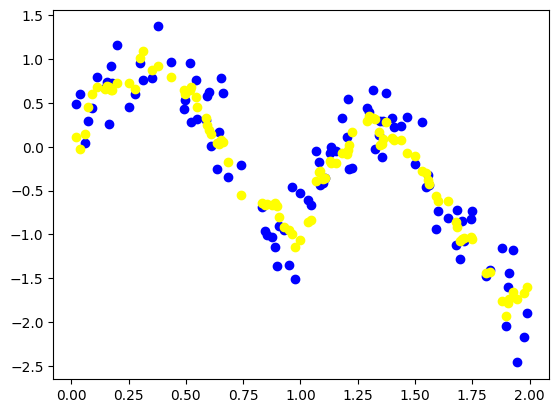

In [147]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes. MSE of our model on test data has decreased significantly. The higher performance is shown in the plot too. Our model has explained much higher variance and it has taken the shape of the input test data.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

I think this method will yield a better results than linear regression. However, KNN is similar to LWLR in the sense that they tend to look to nearest points. So KNN might not be better than LWLR.

### Part10:
Implementing the `KNN model`.

In [148]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X.ravel()
        self.Y = Y.ravel()

    def distance(self, x1, x2):
        distance = x1 - x2
        return distance

    def return_nn_ids(self, x):
        indices = np.argpartition(np.abs(self.X - x), self.k)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [149]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [150]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09695931959882734


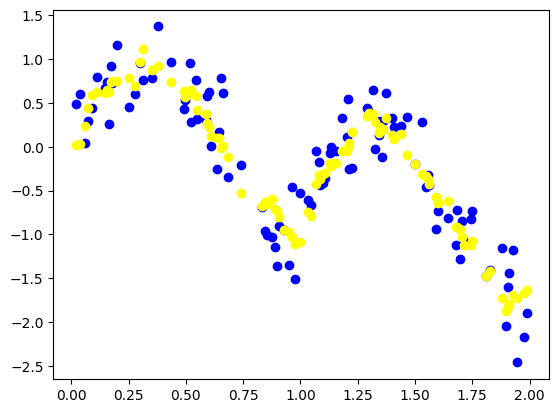

In [151]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes. KNN performed better than LR, and it results were comparable with LWLR. The plot is much better than estimating with a line.